# Importing necessary libraries

In [1]:
import tensorflow as tf
#from tensorflow.keras import layers
#from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Flatten, LSTM,Dropout,Conv2D,TimeDistributed
from tensorflow.keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, TimeDistributed, Dropout
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import (Conv2D, TimeDistributed, MaxPooling2D,
                                     MaxPooling3D, AveragePooling2D, Conv2DTranspose, UpSampling2D,
                                     BatchNormalization,
                                     Dense, Flatten, Reshape,Dropout)

**Data preprocessing**

In [2]:
def ramp_classifier_output(labels,n=10):
    ramp_out=np.zeros((labels.shape[0],32,n))
    ramp=np.linspace(0,2,32)

    for i in range(labels.shape[0]):
        ramp_out[i,:,int(labels[i])]=ramp
    return ramp_out
    

In [3]:
def cross_entropy_output(labels,n=10):
    cross_entropy_out=np.zeros((labels.shape[0],32,n))
    ce=np.ones(32)

    for i in range(labels.shape[0]):
        cross_entropy_out[i,:,int(labels[i])]=ce
    return cross_entropy_out

In [4]:
import tensorflow as tf

def cross_entropy_output_tf(labels, n=10):
    # Create a tensor of zeros with the desired shape
    cross_entropy_out = tf.zeros((tf.shape(labels)[0], 32, n), dtype=tf.float32)
    
    # Create a tensor of ones with shape (32,) (equivalent to np.ones(32))
    ce = tf.ones((32,), dtype=tf.float32)

    # Loop through each label and set the cross-entropy output
    for i in range(tf.shape(labels)[0]):
        cross_entropy_out = cross_entropy_out[i].assign(tf.tensor_scatter_nd_update(
            cross_entropy_out[i], [[i, int(labels[i])]], [ce]))

    return cross_entropy_out


In [5]:
import tensorflow as tf

def cross_entropy_output_tf(labels, n=10):
    # Create a tensor of zeros with the desired shape
    cross_entropy_out = tf.zeros((tf.shape(labels)[0], 32, n), dtype=tf.float32)

    # Create a tensor of ones with shape (32,) (equivalent to np.ones(32))
    ce = tf.ones((32,), dtype=tf.float32)

    # Create indices for where to place the ones
    indices = []
    updates = []

    for i in range(tf.shape(labels)[0]):
        indices.append([i, int(labels[i])])  # Append the indices where ones should be placed
        updates.append(ce)  # Append the values to be placed

    # Convert lists to tensors
    indices = tf.convert_to_tensor(indices, dtype=tf.int32)
    updates = tf.convert_to_tensor(updates, dtype=tf.float32)

    # Use tensor_scatter_nd_update to place ones at the desired positions
    cross_entropy_out = tf.tensor_scatter_nd_update(cross_entropy_out, indices, updates)

    return cross_entropy_out


In [6]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


Loading necessary data

In [7]:
X_train=np.load('X_trn_img.npy')
X_test=np.load('X_test_img.npy')

In [8]:
X_test.shape

(1000, 32, 20, 20)

In [9]:
X_test=[X_test[10*i] for i in range(0, int(X_test.shape[0]/10))]
X_test=np.array(X_test)

In [10]:
X_test.shape

(100, 32, 20, 20)

In [11]:
X_test_img=[]
for i in range(100):
    for j in range(54):
        X_test_img.append(X_test[i])
X_test_img=np.array(X_test_img)

In [13]:
np.save("X_test_img_5400.npy",X_test_img)

In [14]:
X_test_img.shape

(5400, 32, 20, 20)

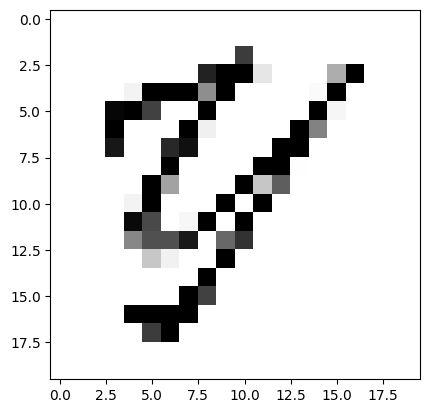

In [15]:
plt.imshow(X_test_img[5050][0], cmap='gray')

In [12]:
y_train=np.load('X_eeg_train.npy')
y_test=np.load('X_eeg_test.npy')
y_test=np.load("../data_for_ogan/X_eeg_test.npy")

y_train = np.moveaxis(y_train, 1, 2)
y_test=np.moveaxis(y_test,1,2)
print(y_train.shape)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train.reshape(-1, y_train.shape[-1])).reshape(y_train.shape)
y_test = scaler.fit_transform(y_test.reshape(-1, y_test.shape[-1])).reshape(y_test.shape)

squeezed_data = np.squeeze(y_train, axis=-1)
squeezed_data1 = np.squeeze(y_test, axis=-1)

print(squeezed_data.shape)
#eeg_data= squeezed_data
main_EEG = squeezed_data[:, :, 6]  # 6 ,7 o1,o2
print(main_EEG.shape)
y_train1=main_EEG
y_test1=squeezed_data1[:,:,6]
y_train1=np.expand_dims(y_train1,axis=-1)
y_test1=np.expand_dims(y_test1,axis=-1)
print(y_test1.shape)



"""eeg_data_normalized = np.zeros_like(eeg_data)

for i in range(eeg_data.shape[0]):
    eeg_data_normalized[i, :] = scaler.fit_transform(eeg_data[i, :].reshape(-1, 1)).reshape(-1)


print(eeg_data_normalized.shape)"""



(40000, 32, 14, 1)
(40000, 32, 14)
(40000, 32)
(5400, 32, 1)


'eeg_data_normalized = np.zeros_like(eeg_data)\n\nfor i in range(eeg_data.shape[0]):\n    eeg_data_normalized[i, :] = scaler.fit_transform(eeg_data[i, :].reshape(-1, 1)).reshape(-1)\n\n\nprint(eeg_data_normalized.shape)'

In [31]:
y_train_labels=np.load('Y_train_labels.npy')
"""y_test_classify=np.load('Y_test_labels.npy')
y_train_labels_filtered=y_train"""

"y_test_classify=np.load('Y_test_labels.npy')\ny_train_labels_filtered=y_train"

In [32]:
y_test_labels=np.load("../data_for_ogan/Y_test_labels.npy")

In [33]:
y_test_labels[540:1080].sum()

np.float64(540.0)

In [34]:
y_test_classify=ramp_classifier_output(y_test_labels)

In [35]:
#y_test_classify.shape

In [36]:
#y_test_signals=np.load("../data_for_ogan/X_eeg_test.npy")

In [37]:
#y_test.shape

In [38]:
#y_test_signals.shape

In [39]:
y_train_classify=ramp_classifier_output(y_train_labels,n=10)
#y_test_classify=ramp_classifier_output(y_test_labels,n=10)

#y_train_gen=ramp_classifier_output(9*np.ones(100),n=10)

In [40]:
#y_train_classify_ce=cross_entropy_output(y_train_labels,n=10)
#y_test_classify_ce=cross_entropy_output(y_test_labels,n=10)

#y_train_gen_ce=cross_entropy_output(9*np.ones(100),n=10)

In [28]:
"""X_train = X_train.reshape(X_train.shape[0], 32, 400)
X_test = X_test.reshape(X_test.shape[0], 32, 400)"""


'X_train = X_train.reshape(X_train.shape[0], 32, 400)\nX_test = X_test.reshape(X_test.shape[0], 32, 400)'

In [29]:
y_train_all=np.squeeze(y_train)

In [30]:
y_train_all.shape

(40000, 32, 14)

Additional helper data

In [41]:
#X_autoencoder=X_autoencoder.reshape(X_autoencoder.shape[0], 32, 400)

X_autoencoder=[]
import cv2
letters=['A','C','F','H','J','M','P','S','T','Y']
letters_small=['a','c','f','h','j','m','p','s','t','y']

root_folder='../data_for_OGAN/images/'
for i in range(len(letters)):
    curr_folder=f'{root_folder}{letters[i]}/{letters_small[i]} ('
    for j in range(20):
        img_path=f'{curr_folder}{j+1}).png'
        #print(img_path)
        image = cv2.imread(img_path)
        #print(image)
        resized_image = cv2.resize(image, (20, 20))
        gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
        X_autoencoder.append(np.stack([gray_image] * 32, axis=0))


X_autoencoder=np.array(X_autoencoder)
X_autoencoder=X_autoencoder.reshape(X_autoencoder.shape[0], 32, 400)
y_autoencoder=[0 for i in range(20)]+[1 for i in range(20)]+[2 for i in range(20)]+[3 for i in range(20)]+[4 for i in range(20)]+[5 for i in range(20)]+[6 for i in range(20)]+[7 for i in range(20)]+[8 for i in range(20)]+[9 for i in range(20)]

y_autoencoder=np.array(y_autoencoder)
y_autoencoder=ramp_classifier_output(y_autoencoder,n=10)


In [13]:
#main_classifier
@tf.function
def real_cal(r, phi):
    return r * tf.math.cos(phi)

@tf.function
def imag_cal(r, phi):
    return r * tf.math.sin(phi)

@tf.function
def oscillator_loop(X_r, X_i, omegas, num_steps):
    # batch_size x timesteps X dim
    r_arr = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True) # creates empty array to save r_t
    phi_arr = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
    r_t = tf.ones((tf.shape(X_r)[0], tf.shape(X_r)[-1])) # Initializing r_t
    phis = tf.zeros((tf.shape(X_r)[0], tf.shape(X_r)[-1])) # Initislizing phi_t
    dt = 1/128
    input_scaler = 2
    beta=1

    for t in tf.range(num_steps):
        input_r = input_scaler*X_r[:,t,:]*tf.math.cos(phis)
        input_phi = input_scaler*X_i[:,t,:]*tf.math.sin(phis)
        r_t = r_t + ((1 - beta*tf.square(r_t)) * r_t + input_r) * dt
        phis = phis + (omegas - input_phi) * dt
        r_arr = r_arr.write(r_arr.size(), r_t)  #1000,1,2
        phi_arr = phi_arr.write(phi_arr.size(), phis)
    r_arr = tf.transpose(r_arr.stack(), [1, 0, 2])  # Changing dimensions to 1,1000,2
    phi_arr = tf.transpose(phi_arr.stack(), [1, 0, 2])
    return r_arr, phi_arr

class Hopf(tf.keras.layers.Layer):

    def __init__(self, units, num_steps, min_omega=0.1,
                 max_omega=64.1,train_omegas=True, **kwargs):
        super(Hopf, self).__init__(**kwargs)
        self.units = units
        self.num_steps = num_steps
        self.train_omegas=train_omegas
        self.max_omega=max_omega
        self.min_omega=min_omega
        # self.omegas = tf.linspace(min_omega, max_omega, self.units) * (2*3.1415)
        # self.omegas = tf.cast(tf.expand_dims(self.omegas, 0), 'float32')

        omega_init=tf.random.uniform((1,self.units),-1,1)
        self.omegas=tf.Variable(omega_init,trainable=self.train_omegas)

    def call(self, X_r, X_i):
        omega_intl = self.max_omega - self.min_omega
        omega_inp = tf.sigmoid(0.5*self.omegas) * omega_intl + self.min_omega


        r, phi = oscillator_loop(X_r, X_i, omega_inp , self.num_steps)
        z_real = real_cal(r, phi)
        z_imag = imag_cal(r, phi)
        return z_real, z_imag


duration = 32


In [43]:
class Model_classifier(tf.keras.Model):
    def __init__(self, units1, units2,units21,units22,units23, units3,units4,  units5, units7, units6,  **kwargs):
        super(Model_classifier, self).__init__(**kwargs)

        self.d1=tf.keras.layers.Dense(units1, activation='relu')  # 250
        self.d2=tf.keras.layers.Dense(units2, activation='relu')  #200
        self.d21=tf.keras.layers.Dense(units21, activation='relu')  #150
        self.d22=tf.keras.layers.Dense(units22, activation='relu')  #100
        self.d23=tf.keras.layers.Dense(units23, activation='relu')  #50


        self.d3_r=tf.keras.layers.Dense(units3, activation='relu')
        self.d3_i=tf.keras.layers.Dense(units3, activation='relu')
        self.osc1=Hopf(units4, num_steps=duration, min_omega=0.1, max_omega=64.1, train_omegas=True)

        #self.d3_r1=tf.keras.layers.Dense(units9, activation='relu')
        #self.d3_i1=tf.keras.layers.Dense(units9, activation='relu')
        #self.osc2=Hopf(units10, num_steps=duration, min_omega=0.1, max_omega=64.1, train_omegas=True)

        self.d4_r=tf.keras.layers.Dense(units5, activation='tanh')
        self.d4_i=tf.keras.layers.Dense(units5, activation='tanh')

        self.d5=tf.keras.layers.Dense(units7, activation='tanh')
        #self.d6=tf.keras.layers.Dense(units8, activation='tanh')

        #self.d5_i=tf.keras.layers.Dense(units7, activation='tanh')
        self.out_dense=tf.keras.layers.Dense(units6, activation='linear')
    
    def call(self, X):
        out1=tf.keras.layers.TimeDistributed(self.d1)(X)    #250
        out2=tf.keras.layers.TimeDistributed(self.d2)(out1) #200
        out21=tf.keras.layers.TimeDistributed(self.d21)(out2) #150
        out22=tf.keras.layers.TimeDistributed(self.d22)(out21) #100
        out23=tf.keras.layers.TimeDistributed(self.d23)(out22) #50


        out3_r=tf.keras.layers.TimeDistributed(self.d3_r)(out23) #25
        out3_i=tf.keras.layers.TimeDistributed(self.d3_i)(out23)
        z1_r, z1_i = self.osc1(out3_r, out3_i)

        #out3_r1=tf.keras.layers.TimeDistributed(self.d3_r1)(z1_r)
        #out3_i1=tf.keras.layers.TimeDistributed(self.d3_i1)(z1_i)
        #z1_r1, z1_i1 = self.osc2(out3_r1, out3_i1)

        out4_r=tf.keras.layers.TimeDistributed(self.d4_r)(z1_r)
        out4_i=tf.keras.layers.TimeDistributed(self.d4_i)(z1_i)
        concat_inp=tf.concat([out4_r,out4_i],2)
        out5=tf.keras.layers.TimeDistributed(self.d5)(concat_inp)
        #out6=tf.keras.layers.TimeDistributed(self.d6)(out5)


        out_final=tf.keras.layers.TimeDistributed(self.out_dense)(out5)

        return out_final
        #return [out3_r,out3_i]

model_classifier =  Model_classifier(250, 200,150,100, 50,25, 25,20, 15,10)

In [44]:
class Model_classifier2(tf.keras.Model):
    def __init__(self, units1, units2,units21,units22,units23, units3,units4,  units5, units7, units6,  **kwargs):
        super(Model_classifier2, self).__init__(**kwargs)

        self.d1=tf.keras.layers.Dense(units1, activation='relu')  # 250
        self.d2=tf.keras.layers.Dense(units2, activation='relu')  #200
        self.d21=tf.keras.layers.Dense(units21, activation='relu')  #150
        self.d22=tf.keras.layers.Dense(units22, activation='relu')  #100
        self.d23=tf.keras.layers.Dense(units23, activation='relu')  #50


        self.d3_r=tf.keras.layers.Dense(units3, activation='relu')
        self.d3_i=tf.keras.layers.Dense(units3, activation='relu')
        self.osc1=Hopf(units4, num_steps=duration, min_omega=0.1, max_omega=64.1, train_omegas=True)

        #self.d3_r1=tf.keras.layers.Dense(units9, activation='relu')
        #self.d3_i1=tf.keras.layers.Dense(units9, activation='relu')
        #self.osc2=Hopf(units10, num_steps=duration, min_omega=0.1, max_omega=64.1, train_omegas=True)

        self.d4_r=tf.keras.layers.Dense(units5, activation='tanh')
        self.d4_i=tf.keras.layers.Dense(units5, activation='tanh')

        self.d5=tf.keras.layers.Dense(units7, activation='tanh')
        #self.d6=tf.keras.layers.Dense(units8, activation='tanh')

        #self.d5_i=tf.keras.layers.Dense(units7, activation='tanh')
        self.out_dense=tf.keras.layers.Dense(units6, activation='linear')
    
    def call(self, X):
        out1=tf.keras.layers.TimeDistributed(self.d1)(X)    #250
        out2=tf.keras.layers.TimeDistributed(self.d2)(out1) #200
        out21=tf.keras.layers.TimeDistributed(self.d21)(out2) #150
        out22=tf.keras.layers.TimeDistributed(self.d22)(out21) #100
        out23=tf.keras.layers.TimeDistributed(self.d23)(out22) #50


        out3_r=tf.keras.layers.TimeDistributed(self.d3_r)(out23) #25
        out3_i=tf.keras.layers.TimeDistributed(self.d3_i)(out23)
        z1_r, z1_i = self.osc1(out3_r, out3_i)

        #out3_r1=tf.keras.layers.TimeDistributed(self.d3_r1)(z1_r)
        #out3_i1=tf.keras.layers.TimeDistributed(self.d3_i1)(z1_i)
        #z1_r1, z1_i1 = self.osc2(out3_r1, out3_i1)

        out4_r=tf.keras.layers.TimeDistributed(self.d4_r)(z1_r)
        out4_i=tf.keras.layers.TimeDistributed(self.d4_i)(z1_i)
        concat_inp=tf.concat([out4_r,out4_i],2)
        out5=tf.keras.layers.TimeDistributed(self.d5)(concat_inp)
        #out6=tf.keras.layers.TimeDistributed(self.d6)(out5)


        out_final=tf.keras.layers.TimeDistributed(self.out_dense)(out5)

        return [out3_r, out3_i]
        #return [out3_r,out3_i]

model_classifier2 =  Model_classifier2(250, 200,150,100, 50,25, 25,20, 15,10)

In [45]:
optimizer = tf.keras.optimizers.Adam(0.01)
model_classifier.compile(optimizer, 'mse', metrics=['accuracy'])

In [46]:
a=model_classifier(np.random.uniform(0,1,(1,32,400)))
"""model_classifier.load_weights('oscillator_classifier_high_net3.h5')
model_classifier.osc1.omegas=tf.constant(np.load('trained_omegas_classifier_high_net3.npy'))"""
#history_classifier = model_classifier.fit(X_train/255, y_train_classify/8, epochs=300, batch_size=1000,shuffle=True,validation_split=0)
#model_classifier.osc2.omegas=tf.constant(np.load('10_class_data/omega2_GAN.npy'))

"model_classifier.load_weights('oscillator_classifier_high_net3.h5')\nmodel_classifier.osc1.omegas=tf.constant(np.load('trained_omegas_classifier_high_net3.npy'))"

In [47]:
b=model_classifier2(np.random.uniform(0,1,(1,32,400)))

In [48]:
import tensorflow as tf
import h5py

# Path to your h5 file
h5_file_path = 'oscillator_classifier_high_net3.h5'

# Open the h5 file in read mode
with h5py.File(h5_file_path, 'r') as h5_file:
    weights_dict=dict(h5_file)
    layers=list(weights_dict.keys())
    time_distributed_layers=["time_distributed"]
    time_distributed_layers1=[f"time_distributed_{i}" for i in range(1,7)]
    time_distributed_layers+=time_distributed_layers1
    # Load weights for each layer
    for i in range(7):
        # Get the layer name from the h5 file
        layer_name = layers[i]  # Assuming layers are in order
        
        weight_data=[]
        print(dict(h5_file)[layer_name]['model_classifier2_2'].keys())
        
        weight_data.append(dict(h5_file)[layer_name]['model_classifier2_2'][time_distributed_layers[i]]["kernel:0"])
        weight_data.append(dict(h5_file)[layer_name]['model_classifier2_2'][time_distributed_layers[i]]["bias:0"])
        model_classifier2.layers[i].set_weights(weight_data)



<KeysViewHDF5 ['time_distributed']>
<KeysViewHDF5 ['time_distributed_1']>
<KeysViewHDF5 ['time_distributed_2']>
<KeysViewHDF5 ['time_distributed_3']>
<KeysViewHDF5 ['time_distributed_4']>
<KeysViewHDF5 ['time_distributed_5']>
<KeysViewHDF5 ['time_distributed_6']>


In [50]:
a=model_classifier2(np.random.uniform(0,1,(1,32,400)))

In [51]:
"""for i in range(7):
    model_classifier2.layers[i].set_weights(model_classifier.layers[i].get_weights())
    model_classifier2.layers[i].trainable=False


model_classifier2.osc1.omegas=tf.constant(model_classifier.osc1.omegas.numpy().copy())"""


'for i in range(7):\n    model_classifier2.layers[i].set_weights(model_classifier.layers[i].get_weights())\n    model_classifier2.layers[i].trainable=False\n\n\nmodel_classifier2.osc1.omegas=tf.constant(model_classifier.osc1.omegas.numpy().copy())'

In [52]:
"""X_train_compressed=model_classifier2(X_train/255)
X_train_compressed=np.array(X_train_compressed)"""

"""X_train_compressed=np.load("10_class_data/img_compressed.npy")
X_test_compressed=np.load("10_class_data/img_compressed_test.npy")"""

'X_train_compressed=np.load("10_class_data/img_compressed.npy")\nX_test_compressed=np.load("10_class_data/img_compressed_test.npy")'

In [53]:
"""X_test_compressed=model_classifier2(X_test/255)
X_test_compressed=np.array(y_test_compressed)"""
#np.save("10_class_data/img_compressed_test.npy",y_test_compressed)

'X_test_compressed=model_classifier2(X_test/255)\nX_test_compressed=np.array(y_test_compressed)'

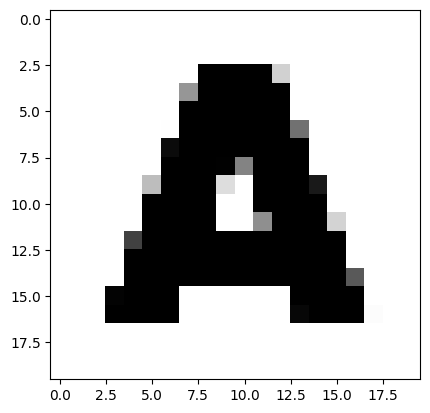

In [54]:
plt.imshow(X_autoencoder[0,0,:].reshape(20,20),cmap='gray')

In [55]:
"""latent_reps=np.array(model_classifier2(X_autoencoder/255))
fig,axs=plt.subplots(10,20,figsize=(400,200))
k=0
print(latent_reps.shape)
for i in range(10):
    print(i+1)
    for j in range(20):
        #print(latent_reps[k,0,:].max(),latent_reps[k,0,:].min())
        axs[i][j].imshow(latent_reps[1,k,0,:].reshape(5,5),cmap='gray')
        k+=1"""

"latent_reps=np.array(model_classifier2(X_autoencoder/255))\nfig,axs=plt.subplots(10,20,figsize=(400,200))\nk=0\nprint(latent_reps.shape)\nfor i in range(10):\n    print(i+1)\n    for j in range(20):\n        #print(latent_reps[k,0,:].max(),latent_reps[k,0,:].min())\n        axs[i][j].imshow(latent_reps[1,k,0,:].reshape(5,5),cmap='gray')\n        k+=1"

In [ ]:
#X_train_compressed=model_classifier2.predict(X_train.reshape(40000,32,400)/255)


In [59]:
#X_test_compressed=model_classifier2.predict(X_test.reshape(1000,32,400)/255)
#np.save("img_compressed_train.npy",X_train_compressed)
#np.save("img_compressed_test.npy",X_test_compressed)

In [60]:
X_train_compressed=np.load("img_compressed_train.npy")
X_test_compressed=np.load("img_compressed_test.npy")

In [62]:
#X_test_compressed.shape

In [63]:
X_test_compressed=model_classifier2.predict(X_test_img.reshape(5400,32,400)/255)
(X_test_img.reshape(5400,32,400)/255).max()

169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step


np.float64(1.0)

In [64]:
X_test_img.max()

np.uint8(255)

In [43]:
#a=np.array(a)

In [54]:
"""c=0

for i in range(200):
    a1=sum(a[i,:])
    indices = np.where(a1 == a1.max())
    #print(indices)
    b1=sum(y_autoencoder[i,:])
    indices1 = np.where(b1 == b1.max())
    print(indices1)

    if indices==indices1:
       c=c+1

print(c)"""

'c=0\n\nfor i in range(200):\n    a1=sum(a[i,:])\n    indices = np.where(a1 == a1.max())\n    #print(indices)\n    b1=sum(y_autoencoder[i,:])\n    indices1 = np.where(b1 == b1.max())\n    print(indices1)\n\n    if indices==indices1:\n       c=c+1\n\nprint(c)'

Generator

In [65]:
#main_classifier

import tensorflow as tf



@tf.function
def rossler_noise_generator(batch_size, num_steps, units, a=0.2, b=0.2, c=5.7):
    # Initialize arrays to store Rössler system values
    x = tf.TensorArray(dtype=tf.float32, size=num_steps)
    y = tf.TensorArray(dtype=tf.float32, size=num_steps)
    z = tf.TensorArray(dtype=tf.float32, size=num_steps)
    
    # Initial conditions as Gaussian noise with batch dimension
    x_t = tf.random.normal((batch_size, units), mean=0.0, stddev=1.0)
    y_t = tf.random.normal((batch_size, units), mean=0.0, stddev=1.0)
    z_t = tf.random.normal((batch_size, units), mean=0.0, stddev=1.0)
    
    dt = 5.0/num_steps  # T/num_steps where T=10
    
    # Generate Rössler system trajectories
    for t in tf.range(num_steps):
        # Update equations
        dx = -y_t - z_t
        dy = x_t + a * y_t
        dz = b + z_t * (x_t - c)
        
        x_t = x_t + dt * dx
        y_t = y_t + dt * dy
        z_t = z_t + dt * dz
        
        # Store current values
        x = x.write(t, x_t)
        y = y.write(t, y_t)
        z = z.write(t, z_t)
    
    # Stack and transpose to get shape (batch_size, num_steps, units)
    x = tf.transpose(x.stack(), [1, 0, 2])  # Shape: (batch_size, num_steps, units)
    
    return x  # Returns full time series with shape (batch_size, num_steps, units)

@tf.function
def real_cal(r, phi):
    return r * tf.math.cos(phi)

@tf.function
def imag_cal(r, phi):
    return r * tf.math.sin(phi)

@tf.function
def oscillator_loop_generator(X_r, X_i, omegas, num_steps):
    # batch_size x timesteps X dim
    r_arr = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True) # creates empty array to save r_t
    phi_arr = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
    r_t = tf.ones((tf.shape(X_r)[0], tf.shape(X_r)[-1])) # Initializing r_t
    phis = tf.zeros((tf.shape(X_r)[0], tf.shape(X_r)[-1])) # Initislizing phi_t
    dt = 1/128
    input_scaler = 500
    beta=1

    for t in tf.range(num_steps):
        input_r = input_scaler*X_r[:,t,:]*tf.math.cos(phis)
        input_phi = input_scaler*X_i[:,t,:]*tf.math.sin(phis)
        r_t = r_t + ((1 - beta*tf.square(r_t)) * r_t + input_r) * dt
        phis = phis + (omegas - input_phi) * dt
        r_arr = r_arr.write(r_arr.size(), r_t)  #1000,1,2
        phi_arr = phi_arr.write(phi_arr.size(), phis)
    r_arr = tf.transpose(r_arr.stack(), [1, 0, 2])  # Changing dimensions to 1,1000,2
    phi_arr = tf.transpose(phi_arr.stack(), [1, 0, 2])
    return r_arr, phi_arr

class Hopf_gen(tf.keras.layers.Layer):

    def __init__(self, units, num_steps, min_omega=0.1,
                 max_omega=64.1,train_omegas=True, **kwargs):
        super(Hopf_gen, self).__init__(**kwargs)
        self.units = units
        self.num_steps = num_steps
        self.train_omegas=train_omegas
        self.max_omega=max_omega
        self.min_omega=min_omega
        # self.omegas = tf.linspace(min_omega, max_omega, self.units) * (2*3.1415)
        # self.omegas = tf.cast(tf.expand_dims(self.omegas, 0), 'float32')

        omega_init=tf.random.uniform((1,self.units),-1,1)
        self.omegas=tf.Variable(omega_init,trainable=self.train_omegas)

    def call(self, X_r, X_i):
        omega_intl = self.max_omega - self.min_omega
        omega_inp = tf.sigmoid(0.5*self.omegas) * omega_intl + self.min_omega


        r, phi = oscillator_loop_generator(X_r, X_i, omega_inp , self.num_steps)
        z_real = real_cal(r, phi)
        z_imag = imag_cal(r, phi)
        return z_real, z_imag


duration = 32

class Model_generator(tf.keras.Model):
    def __init__(self,  units5,units6,units7,units8,units9,units10 , **kwargs):
        super(Model_generator, self).__init__(**kwargs)

        
        # New layers beyond osc2
        self.d3_r1 = tf.keras.layers.Dense(units5, activation='relu')
        self.d3_i = tf.keras.layers.Dense(units5, activation='relu')
        

        self.osc3 = Hopf_gen(units6, num_steps=duration, min_omega=0.1, max_omega=64.1, train_omegas=True)
    
        self.d4_r = tf.keras.layers.Dense(units7, activation='relu')
        self.d4_i = tf.keras.layers.Dense(units7, activation='relu')
        
        self.osc4 = Hopf_gen(units8, num_steps=duration, min_omega=0.1, max_omega=64.1, train_omegas=True)

        self.d5=tf.keras.layers.Dense(units9,activation='tanh')
        
        self.out_dense=tf.keras.layers.Dense(units10,activation='linear')

        #self.d4 = tf.keras.layers.Dense(units7, activation='tanh')
        #self.out_dense = tf.keras.layers.Dense(units6, activation='linear')
    
    def call(self, X):

        min_vals = tf.reduce_min(X, axis=-1, keepdims=True)
        max_vals = tf.reduce_max(X, axis=-1, keepdims=True)

        X = (X - min_vals) / (max_vals - min_vals + 1e-8)

        out3_r1= tf.keras.layers.TimeDistributed(self.d3_r1)(X)
        

        out3_i = tf.keras.layers.TimeDistributed(self.d3_i)(X)
        

        z3_r, z3_i = self.osc3(out3_r1, out3_i)

        #rossler_noise1 = rossler_noise_generator( tf.shape(X)[0], 32, tf.shape(z3_r)[-1])
        rossler_noise1=tf.random.normal((tf.shape(z3_r)[0],32,z3_r.shape[2]),mean=0.0,stddev=1)
        """z3_r = tf.concat([z3_r, rossler_noise1], 2)
        z3_i=tf.concat([z3_i,rossler_noise1],2)"""
        z3_r = z3_r + rossler_noise1
        z3_i = z3_i + rossler_noise1
        out4_r = tf.keras.layers.TimeDistributed(self.d4_r)(z3_r)
        
        out4_i = tf.keras.layers.TimeDistributed(self.d4_i)(z3_i)
        
        out4_r_noise=tf.random.normal((tf.shape(out4_r)[0],32,out4_r.shape[2]),mean=0.0,stddev=1)
        out4_i_noise=tf.random.normal((tf.shape(out4_i)[0],32,out4_i.shape[2]),mean=0.0,stddev=1)
        out4_r = tf.concat([out4_r, out4_r_noise], 2)
        out4_i=tf.concat([out4_i,out4_i_noise],2)
        z4_r, z4_i = self.osc4(out4_r, out4_i)
        
        #z4_noise=tf.random.normal((tf.shape(z4_r)[0],32,z4_r.shape[2]),mean=0.0,stddev=0.5)
        concat_inp2 = tf.concat([z4_r,z4_i], 2)
        out4 = tf.keras.layers.TimeDistributed(self.d5)(concat_inp2)
        out_final = tf.keras.layers.TimeDistributed(self.out_dense)(out4)

        return out_final

model_generator = Model_generator(20, 20,10,20,20,14)
        

In [66]:
#main_classifier

import tensorflow as tf



@tf.function
def rossler_noise_generator(batch_size, num_steps, units, a=0.2, b=0.2, c=5.7):
    # Initialize arrays to store Rössler system values
    x = tf.TensorArray(dtype=tf.float32, size=num_steps)
    y = tf.TensorArray(dtype=tf.float32, size=num_steps)
    z = tf.TensorArray(dtype=tf.float32, size=num_steps)
    
    # Initial conditions as Gaussian noise with batch dimension
    x_t = tf.random.normal((batch_size, units), mean=0.0, stddev=1.0)
    y_t = tf.random.normal((batch_size, units), mean=0.0, stddev=1.0)
    z_t = tf.random.normal((batch_size, units), mean=0.0, stddev=1.0)
    
    dt = 5.0/num_steps  # T/num_steps where T=10
    
    # Generate Rössler system trajectories
    for t in tf.range(num_steps):
        # Update equations
        dx = -y_t - z_t
        dy = x_t + a * y_t
        dz = b + z_t * (x_t - c)
        
        x_t = x_t + dt * dx
        y_t = y_t + dt * dy
        z_t = z_t + dt * dz
        
        # Store current values
        x = x.write(t, x_t)
        y = y.write(t, y_t)
        z = z.write(t, z_t)
    
    # Stack and transpose to get shape (batch_size, num_steps, units)
    x = tf.transpose(x.stack(), [1, 0, 2])  # Shape: (batch_size, num_steps, units)
    
    return x  # Returns full time series with shape (batch_size, num_steps, units)

@tf.function
def real_cal(r, phi):
    return r * tf.math.cos(phi)

@tf.function
def imag_cal(r, phi):
    return r * tf.math.sin(phi)

@tf.function
def oscillator_loop_generator(X_r, X_i, omegas, num_steps):
    # batch_size x timesteps X dim
    r_arr = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True) # creates empty array to save r_t
    phi_arr = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
    r_t = tf.ones((tf.shape(X_r)[0], tf.shape(X_r)[-1])) # Initializing r_t
    #phis = tf.random.uniform(0,1,(tf.shape(X_r)[0], tf.shape(X_r)[-1])) # Initislizing phi_t
    phis = tf.random.uniform(shape=[tf.shape(X_r)[0], tf.shape(X_r)[-1]], minval=0, maxval=0.785)
    r_t=tf.random.uniform(shape=[tf.shape(X_r)[0], tf.shape(X_r)[-1]], minval=0, maxval=0.5)
    dt = 1/128
    input_scaler = 100
    beta=1

    for t in tf.range(num_steps):
        input_r = input_scaler*X_r[:,t,:]*tf.math.cos(phis)
        input_phi = input_scaler*X_i[:,t,:]*tf.math.sin(phis)
        r_t = r_t + ((1 - beta*tf.square(r_t)) * r_t + input_r) * dt
        phis = phis + (omegas - input_phi) * dt
        r_arr = r_arr.write(r_arr.size(), r_t)  #1000,1,2
        phi_arr = phi_arr.write(phi_arr.size(), phis)
    r_arr = tf.transpose(r_arr.stack(), [1, 0, 2])  # Changing dimensions to 1,1000,2
    phi_arr = tf.transpose(phi_arr.stack(), [1, 0, 2])
    return r_arr, phi_arr

class Hopf_gen(tf.keras.layers.Layer):

    def __init__(self, units, num_steps, min_omega=0.1,
                 max_omega=64.1,train_omegas=True, **kwargs):
        super(Hopf_gen, self).__init__(**kwargs)
        self.units = units
        self.num_steps = num_steps
        self.train_omegas=train_omegas
        self.max_omega=max_omega
        self.min_omega=min_omega
        # self.omegas = tf.linspace(min_omega, max_omega, self.units) * (2*3.1415)
        # self.omegas = tf.cast(tf.expand_dims(self.omegas, 0), 'float32')

        omega_init=tf.random.uniform((1,self.units),-1,1)
        self.omegas=tf.Variable(omega_init,trainable=self.train_omegas)

    def call(self, X_r, X_i):
        omega_intl = self.max_omega - self.min_omega
        omega_inp = tf.sigmoid(0.5*self.omegas) * omega_intl + self.min_omega


        r, phi = oscillator_loop_generator(X_r, X_i, omega_inp , self.num_steps)
        z_real = real_cal(r, phi)
        z_imag = imag_cal(r, phi)
        return z_real, z_imag


duration = 32

class Model_generator(tf.keras.Model):
    def __init__(self,  units5,units6,units7,units8,units9,units10 , **kwargs):
        super(Model_generator, self).__init__(**kwargs)

        
        # New layers beyond osc2
        self.d3_r1 = tf.keras.layers.Dense(units5, activation='relu')
        self.d3_i = tf.keras.layers.Dense(units5, activation='relu')
        

        self.osc3 = Hopf_gen(units6, num_steps=duration, min_omega=0.1, max_omega=64.1, train_omegas=True)
        self.bn1=tf.keras.layers.BatchNormalization(center=False, scale=False)
        self.d4_r = tf.keras.layers.Dense(units7, activation='relu')
        self.bn2=tf.keras.layers.BatchNormalization(center=False, scale=False)
        self.d4_i = tf.keras.layers.Dense(units7, activation='relu')
        self.bn3=tf.keras.layers.BatchNormalization(center=False, scale=False)
        self.osc4 = Hopf_gen(units8, num_steps=duration, min_omega=0.1, max_omega=64.1, train_omegas=True)
        self.bn4=tf.keras.layers.BatchNormalization(center=False, scale=False)
        self.d5=tf.keras.layers.Dense(units9,activation='tanh')
        self.bn5=tf.keras.layers.BatchNormalization(center=False, scale=False)
        self.out_dense=tf.keras.layers.Dense(units10,activation='linear')
        self.bn6=tf.keras.layers.BatchNormalization(center=False, scale=False)
        self.bn7=tf.keras.layers.BatchNormalization(center=False, scale=False)
        #self.d4 = tf.keras.layers.Dense(units7, activation='tanh')
        #self.out_dense = tf.keras.layers.Dense(units6, activation='linear')
    
    def call(self, inputs):
        X1=inputs[0]
        X2=inputs[1]

        min_vals = tf.reduce_min(X1, axis=-1, keepdims=True)
        max_vals = tf.reduce_max(X1, axis=-1, keepdims=True)

        X1 = (X1 - min_vals) / (max_vals - min_vals + 1e-8)

        min_vals = tf.reduce_min(X2, axis=-1, keepdims=True)
        max_vals = tf.reduce_max(X2, axis=-1, keepdims=True)

        X2 = (X2 - min_vals) / (max_vals - min_vals + 1e-8)

        #X=tf.random.normal((tf.shape(X1)[0],32,X1.shape[2]),mean=0.0,stddev=1)
        Z1=tf.random.normal((tf.shape(X1)[0],32,X1.shape[2]),mean=0.0,stddev=1)
        Z2=tf.random.normal((tf.shape(X1)[0],32,X1.shape[2]),mean=0.2,stddev=1)
        Z3=tf.random.normal((tf.shape(X1)[0],32,X1.shape[2]),mean=-0.2,stddev=1)
        Z=Z1+Z2+Z3
        Z=self.bn1(Z)
        X=Z*X1+X2        
        #X=X*X1+X2

        out3_r1= tf.keras.layers.TimeDistributed(self.d3_r1)(X)
        #out3_r=self.bn1(out3_r1)
        #out3_r1=out3_r*X1+X2
        out3_i = tf.keras.layers.TimeDistributed(self.d3_i)(X)
        #out3_i=self.bn2(out3_i)
        #out3_i=out3_i*X1+X2
        

        z3_r, z3_i = self.osc3(out3_r1, out3_i)
        #rossler_noise1=tf.random.normal((tf.shape(z3_r)[0],32,z3_r.shape[2]),mean=0.0,stddev=1)
        
        #z3_r = z3_r + rossler_noise1
        #z3_i = z3_i + rossler_noise1
        #z3_r=self.bn3(z3_r)
        #z3_r=z3_r*X1+X2
        #z3_i=self.bn4(z3_i)
        #z3_i=z3_i*X1+X2
        out4_r = tf.keras.layers.TimeDistributed(self.d4_r)(z3_r)
        #out4_r=self.bn5(out4_r)
        #out4_r=out4_r*X1+X2
        
        out4_i = tf.keras.layers.TimeDistributed(self.d4_i)(z3_i)
        out4_r_noise=tf.random.normal((tf.shape(out4_r)[0],32,out4_r.shape[2]),mean=0.0,stddev=1)
        out4_i_noise=tf.random.normal((tf.shape(out4_i)[0],32,out4_i.shape[2]),mean=0.0,stddev=1)
        #out4_r=out4_r+out4_r_noise
        #out4_i=out4_i+out4_i_noise
        #out4_i=self.bn6(out4_i)
        #out4_i=out4_i*X1+X2
        
        #out4_r_noise=tf.random.normal((tf.shape(out4_r)[0],32,out4_r.shape[2]),mean=0.0,stddev=1)
        #out4_i_noise=tf.random.normal((tf.shape(out4_i)[0],32,out4_i.shape[2]),mean=0.0,stddev=1)
        #out4_r = tf.concat([out4_r, out4_r_noise], 2)
        #out4_i=tf.concat([out4_i,out4_i_noise],2)
        z4_r, z4_i = self.osc4(out4_r, out4_i)
        #z4_r=self.bn7(z4_r)
        #z4_r=z4_r*X1+X2
        #z4_i=self.bn7(z4_i)
        #z4_i=z4_i*X1+X2
        
        #z4_noise=tf.random.normal((tf.shape(z4_r)[0],32,z4_r.shape[2]),mean=0.0,stddev=0.5)
        concat_inp2 = tf.concat([z4_r,z4_i], 2)
        out4 = tf.keras.layers.TimeDistributed(self.d5)(concat_inp2)
        out_final = tf.keras.layers.TimeDistributed(self.out_dense)(out4)

        return out_final

#model_generator = Model_generator(20, 20,10,20,20,14)
model_generator = Model_generator(40, 40,40,40,30,14)

In [67]:


# Access and print the weights of individual layers
for layer in model_generator.layers:
    print(layer)
    layer_weights = layer.get_weights()
    print(f"Weights of layer {layer.name}:")
    for weight in layer_weights:
        print(weight.shape)

<Dense name=dense_28, built=False>
Weights of layer dense_28:
<Dense name=dense_29, built=False>
Weights of layer dense_29:
<Hopf_gen name=hopf_gen_2, built=False>
Weights of layer hopf_gen_2:
<BatchNormalization name=batch_normalization, built=False>
Weights of layer batch_normalization:
<Dense name=dense_30, built=False>
Weights of layer dense_30:
<BatchNormalization name=batch_normalization_1, built=False>
Weights of layer batch_normalization_1:
<Dense name=dense_31, built=False>
Weights of layer dense_31:
<BatchNormalization name=batch_normalization_2, built=False>
Weights of layer batch_normalization_2:
<Hopf_gen name=hopf_gen_3, built=False>
Weights of layer hopf_gen_3:
<BatchNormalization name=batch_normalization_3, built=False>
Weights of layer batch_normalization_3:
<Dense name=dense_32, built=False>
Weights of layer dense_32:
<BatchNormalization name=batch_normalization_4, built=False>
Weights of layer batch_normalization_4:
<Dense name=dense_33, built=False>
Weights of layer

In [68]:
"""# Access the layer by name
layer_name = 'dense_16'  # Replace with the actual layer name
layer = model_generator.get_layer(name=layer_name)

# Get the weights of the layer
weights = layer.get_weights()

# Print the weights
print(f"Weights of layer {layer_name}:")
for weight in weights:
    print(weight.shape)
    print(weight[:20].mean())
    print(weight[20:].mean())"""

'# Access the layer by name\nlayer_name = \'dense_16\'  # Replace with the actual layer name\nlayer = model_generator.get_layer(name=layer_name)\n\n# Get the weights of the layer\nweights = layer.get_weights()\n\n# Print the weights\nprint(f"Weights of layer {layer_name}:")\nfor weight in weights:\n    print(weight.shape)\n    print(weight[:20].mean())\n    print(weight[20:].mean())'

In [69]:
X_autoencoder_compressed=model_classifier2(X_autoencoder/255)
print(X_autoencoder_compressed[0].shape)
X_autoencoder_compressed=np.array(X_autoencoder_compressed)

(200, 32, 25)


In [70]:
"""X_train_compressed1 = []
for i in range(200):
    # Create concatenated input from both real and imaginary parts
    current_sample = X_autoencoder_compressed[0][i:i+1]
    X_train_compressed1 += np.repeat(current_sample, repeats=200, axis=0).tolist()
X_train_compressed1 = np.array(X_train_compressed1)"""

'X_train_compressed1 = []\nfor i in range(200):\n    # Create concatenated input from both real and imaginary parts\n    current_sample = X_autoencoder_compressed[0][i:i+1]\n    X_train_compressed1 += np.repeat(current_sample, repeats=200, axis=0).tolist()\nX_train_compressed1 = np.array(X_train_compressed1)'

In [71]:
#X_train_compressed1.shape

In [72]:
"""X_train_compressed2 = []
for i in range(200):
    # Create concatenated input from both real and imaginary parts
    current_sample = X_autoencoder_compressed[1][i:i+1]
    X_train_compressed2 += np.repeat(current_sample, repeats=200, axis=0).tolist()
X_train_compressed2 = np.array(X_train_compressed2)"""

'X_train_compressed2 = []\nfor i in range(200):\n    # Create concatenated input from both real and imaginary parts\n    current_sample = X_autoencoder_compressed[1][i:i+1]\n    X_train_compressed2 += np.repeat(current_sample, repeats=200, axis=0).tolist()\nX_train_compressed2 = np.array(X_train_compressed2)'

In [73]:
#X_train_compressed=[X_train_compressed1,X_train_compressed2]

In [79]:
x=model_generator([X_autoencoder_compressed[0],X_autoencoder_compressed[1]])
y=model_generator([X_autoencoder_compressed[0],X_autoencoder_compressed[1]])

In [75]:
"""import numpy as np
from sklearn.cluster import KMeans

# Assuming your data is a 200x25 NumPy array

# Initialize KMeans with the desired number of clusters (e.g., 5 clusters)
X_pca=X_autoencoder_compressed[:,0,:]
kmeans = KMeans(n_clusters=10, random_state=42)

# Fit the model to the data
kmeans.fit(X_pca)

# Get the cluster labels
labels = kmeans.labels_

# Print the labels
print(labels)"""


'import numpy as np\nfrom sklearn.cluster import KMeans\n\n# Assuming your data is a 200x25 NumPy array\n\n# Initialize KMeans with the desired number of clusters (e.g., 5 clusters)\nX_pca=X_autoencoder_compressed[:,0,:]\nkmeans = KMeans(n_clusters=10, random_state=42)\n\n# Fit the model to the data\nkmeans.fit(X_pca)\n\n# Get the cluster labels\nlabels = kmeans.labels_\n\n# Print the labels\nprint(labels)'

In [80]:
#X_autoencoder_compressed

In [81]:
y[21,:,6]

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([-0.74663645, -0.8219425 , -0.7665651 , -0.65561736, -0.4730778 ,
       -0.4139045 , -0.4032091 , -0.4349712 , -0.512594  , -0.48659727,
       -0.45720544, -0.41234988, -0.4574712 , -0.522609  , -0.40798107,
       -0.25337017, -0.15459882, -0.23925388, -0.5559104 , -0.9471142 ,
       -1.2423453 , -1.5528711 , -1.7409469 , -1.7790248 , -1.44449   ,
       -0.9179803 , -0.13472137,  0.4740832 ,  0.73634833,  1.02109   ,
        0.927867  ,  0.10022953], dtype=float32)>

'plt.plot(x[20,:,6])\nplt.plot(x[40,:,6])\nplt.plot(x[60,:,6])\nplt.plot(x[80,:,6])\nplt.plot(x[100,:,6])\nplt.plot(x[120,:,6])\nplt.plot(x[140,:,6])\nplt.plot(x[160,:,6])'

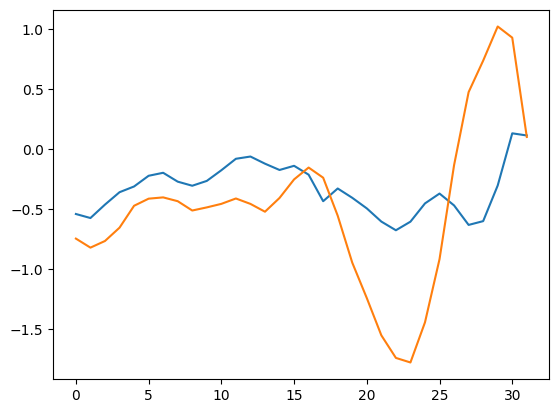

In [82]:
plt.plot(x[21,:,6])
plt.plot(y[21,:,6])
"""plt.plot(x[20,:,6])
plt.plot(x[40,:,6])
plt.plot(x[60,:,6])
plt.plot(x[80,:,6])
plt.plot(x[100,:,6])
plt.plot(x[120,:,6])
plt.plot(x[140,:,6])
plt.plot(x[160,:,6])"""

In [83]:
class Model_discriminator(tf.keras.Model):
    def __init__(self, units1, units2, units3, units4, units5,units6,  **kwargs):
        super(Model_discriminator, self).__init__(**kwargs)

        # osc1
        self.d1_r = tf.keras.layers.Dense(units1, activation='relu')
        self.d1_i = tf.keras.layers.Dense(units1, activation='relu')
        self.d1n4_r = TimeDistributed(BatchNormalization())  # Added BatchNorm
        self.d1n4_i = TimeDistributed(BatchNormalization())  # Added BatchNorm
        self.osc1 = Hopf(units2, num_steps=duration, min_omega=0.1, max_omega=64.1, train_omegas=True)

        # osc2
        self.d2_r = tf.keras.layers.Dense(units3, activation='relu')
        self.d2_i = tf.keras.layers.Dense(units3, activation='relu')
        self.d2n4_r = TimeDistributed(BatchNormalization())  # Added BatchNorm
        self.d2n4_i = TimeDistributed(BatchNormalization())
        self.osc2 = Hopf(units4, num_steps=duration, min_omega=0.1, max_omega=64.1, train_omegas=True)

        # New layers beyond osc2
        self.d3_r = tf.keras.layers.Dense(units5, activation='tanh')
        self.d3_i = tf.keras.layers.Dense(units5, activation='tanh')
        #self.d4 = tf.keras.layers.Dense(units7, activation='tanh')
        self.d3n4=TimeDistributed(BatchNormalization()) 
        self.out_dense = tf.keras.layers.Dense(units6, activation='linear')
    
    def call(self, X):
        X1 = tf.identity(X)
        out1_r = tf.keras.layers.TimeDistributed(self.d1_r)(X1)
        out1_i = tf.keras.layers.TimeDistributed(self.d1_i)(X1)
        out1_r=self.d1n4_r(out1_r)
        out1_i=self.d1n4_i(out1_i)
        z1_r, z1_i = self.osc1(out1_r, out1_i)

        out2_r = tf.keras.layers.TimeDistributed(self.d2_r)(z1_r)
        out2_i = tf.keras.layers.TimeDistributed(self.d2_i)(z1_i)
        out2_r=self.d2n4_r(out2_r)
        out2_i=self.d2n4_i(out2_i)
        z2_r, z2_i = self.osc2(out2_r, out2_i)

        out3_r = tf.keras.layers.TimeDistributed(self.d3_r)(z2_r)
        out3_i = tf.keras.layers.TimeDistributed(self.d3_i)(z2_i)
        concat_inp = tf.concat([out3_r, out3_i], 2)
        concat_inp=self.d3n4(concat_inp)
        #out4 = tf.keras.layers.TimeDistributed(self.d4)(concat_inp)
        out_final = tf.keras.layers.TimeDistributed(self.out_dense)(concat_inp)

        return out_final

#model_discriminator=Model_discriminator(7, 7, 4, 4, 3, 2)
#model_discriminator=Model_discriminator(30, 30, 20, 20, 15, 10)

model_discriminator1=Model_discriminator(50, 50, 35, 35, 20, 10)
model_discriminator2=Model_discriminator(50, 50, 35, 35, 20, 10)
model_discriminator3=Model_discriminator(50, 50, 35, 35, 20, 10)
model_discriminator4=Model_discriminator(50, 50, 35, 35, 20, 10)
model_discriminator5=Model_discriminator(50, 50, 35, 35, 20, 10)
model_discriminator6=Model_discriminator(50, 50, 35, 35, 20, 10)
model_discriminator7=Model_discriminator(50, 50, 35, 35, 20, 10)
"""model_discriminator8=Model_discriminator(50, 50, 35, 35, 20, 10)
model_discriminator9=Model_discriminator(50, 50, 35, 35, 20, 10)"""

'model_discriminator8=Model_discriminator(50, 50, 35, 35, 20, 10)\nmodel_discriminator9=Model_discriminator(50, 50, 35, 35, 20, 10)'

In [15]:


class Model(tf.keras.Model):

    def __init__(self, units1, units2,units3,units4,units5, **kwargs):

        super(Model, self).__init__(**kwargs)

        self.d1_r = tf.keras.layers.Dense(units1,activation='relu') # 1st relu layer(real) with neuron=units1
        self.d1_i = tf.keras.layers.Dense(units1,activation='relu')# 1st relu layer(imag) with neuron=units1

        self.osc1 = Hopf(units2, num_steps=32,min_omega=0.1, max_omega=64.1,train_omegas=True) # 1st osc layer=units2=units1

        self.d_r = tf.keras.layers.Dense(units3,activation='tanh') # 1st relu layer(real) with neuron=units1
        self.d_i = tf.keras.layers.Dense(units3,activation='tanh')# 1st relu layer(imag) with neuron=units1
        
        
        self.dense = tf.keras.layers.Dense(units4, activation='relu') # 2nd relu layer,units3

        #self.d2_dr = tf.keras.layers.Dense(units4, activation='linear') #last tanh layer,units5
        #self.d2_i = tf.keras.layers.Dense(units4, activation='linear') #last tanh layer,units5
        # self.dense2= tf.keras.layers.Dense(units5, activation='relu') # 2nd relu layer,units3

        self.out_dense = tf.keras.layers.Dense(units5, activation='linear')# output node, units6, with tanh

    def call(self, X):

        out1_r = tf.keras.layers.TimeDistributed(self.d1_r)(X)
        out1_i = tf.keras.layers.TimeDistributed(self.d1_i)(X)

        z1_r, z1_i = self.osc1(out1_r, out1_i)


        #concat_inp=tf.concat([z1_r, z1_i],2)
        out2_r = tf.keras.layers.TimeDistributed(self.d_r)(z1_r)
        out2_i = tf.keras.layers.TimeDistributed(self.d_i)(z1_i)

        concat_inp=tf.concat([out2_r,out2_i],2)
        # lstmout=self.lstm(concat_inp)
        
        #out3_r = tf.keras.layers.TimeDistributed(self.d2_r)(out2_r)
        #out3_i = tf.keras.layers.TimeDistributed(self.d2_i)(out2_i)
        #out3=tf.concat([out3_r,out3_i],2)
        denseout=tf.keras.layers.TimeDistributed(self.dense)(concat_inp)
        # denseout2=tf.keras.layers.TimeDistributed(self.dense2)(denseout)
        out_final = tf.keras.layers.TimeDistributed(self.out_dense)(denseout)
        return out_final

model_signal_classifier = Model(250,250,128,64,10)
optimizer = tf.keras.optimizers.Adam(0.01)

model_signal_classifier.build(input_shape=(40000,32,14))
model_signal_classifier.compile(optimizer, 'mse', metrics=['accuracy'])





a=model_signal_classifier(squeezed_data[:1])

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:391: UserWarning: `build()` was called on layer 'model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


In [16]:
for i, layer in enumerate(model_signal_classifier.layers):
    weights_file = f'../classifier-weights/layer_{i}_weights_sravan.npy'
    bias_file=f'../classifier-weights/layer_{i}_bias_sravan.npy'  # Adjust if you saved as .h5
    try:
        weights =[ np.load(bias_file),np.load(weights_file)]
        layer.set_weights(weights)
        print(f"Loaded weights for layer {i} from {weights_file}")
    except Exception as e:
        model_signal_classifier.osc1.omegas=tf.constant(np.load("../classifier-weights/Osc_omegas_sravan.npy"))
        print(f"oscillatory layer")

Loaded weights for layer 0 from ../classifier-weights/layer_0_weights_sravan.npy
Loaded weights for layer 1 from ../classifier-weights/layer_1_weights_sravan.npy
oscillatory layer
Loaded weights for layer 3 from ../classifier-weights/layer_3_weights_sravan.npy
Loaded weights for layer 4 from ../classifier-weights/layer_4_weights_sravan.npy
Loaded weights for layer 5 from ../classifier-weights/layer_5_weights_sravan.npy
Loaded weights for layer 6 from ../classifier-weights/layer_6_weights_sravan.npy


In [86]:
#y_test_signals=np.squeeze(y_test_signals,axis=-1)
#y_test_signals=np.transpose(y_test_signals,(0,2,1))

In [87]:
#y_test_signals.shape

In [88]:
y_train_all.shape

(40000, 32, 14)

In [89]:
#y_test_pred=model_signal_classifier.predict(squeezed_data1)

In [91]:
"""import numpy as np

# Generate 1000 random indices
np.random.seed(42)  # for reproducibility
random_indices = np.random.choice(y_test_pred.shape[0], size=1000, replace=False)

# Select the samples using these indices
squeezed_data1_sample = squeezed_data1[random_indices]
X_test_compressed_sample =[ X_test_compressed[0][random_indices],X_test_compressed[1][random_indices]]
y_test_pred_sample = model_generator.predict(X_test_compressed_sample)
y_test_classify_pred=model_signal_classifier.predict(y_test_pred_sample)
y_test_classify_sample = y_test_classify[random_indices]

# Print shapes to verify

# Calculate accuracy for the sampled data
accuracy = signal_classifying_accuracy(y_test_classify_sample, y_test_classify_pred)
print("Classification accuracy on sampled data:", accuracy)"""

'import numpy as np\n\n# Generate 1000 random indices\nnp.random.seed(42)  # for reproducibility\nrandom_indices = np.random.choice(y_test_pred.shape[0], size=1000, replace=False)\n\n# Select the samples using these indices\nsqueezed_data1_sample = squeezed_data1[random_indices]\nX_test_compressed_sample =[ X_test_compressed[0][random_indices],X_test_compressed[1][random_indices]]\ny_test_pred_sample = model_generator.predict(X_test_compressed_sample)\ny_test_classify_pred=model_signal_classifier.predict(y_test_pred_sample)\ny_test_classify_sample = y_test_classify[random_indices]\n\n# Print shapes to verify\n\n# Calculate accuracy for the sampled data\naccuracy = signal_classifying_accuracy(y_test_classify_sample, y_test_classify_pred)\nprint("Classification accuracy on sampled data:", accuracy)'

In [92]:
"""y_test_gen=model_generator.predict(X_test_compressed)
y_classify_gen=model_signal_classifier.predict(y_test_gen)"""

'y_test_gen=model_generator.predict(X_test_compressed)\ny_classify_gen=model_signal_classifier.predict(y_test_gen)'

In [93]:
"""y_train_gen=model_generator.predict(X_train_compressed)
y_classify_gen_train=model_signal_classifier.predict(y_train_gen)
signal_classifying_accuracy(y_train_classify,y_classify_gen_train)"""

'y_train_gen=model_generator.predict(X_train_compressed)\ny_classify_gen_train=model_signal_classifier.predict(y_train_gen)\nsignal_classifying_accuracy(y_train_classify,y_classify_gen_train)'

In [95]:
import tensorflow as tf
import numpy as np
#@tf.function
def generator_loss_ramp(y_true,y_pred,y_classify,fake_discriminator,alpha=0.01,beta=0.01,batch=100):
    """ramp_y=ramp_classifier_output(labels,10)/2
    ramp_y=tf.cast(ramp_y,tf.float32)"""
    fake_discriminator=tf.cast(fake_discriminator,tf.float32)
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    mse = tf.keras.losses.MeanSquaredError()
    A= mse(y_classify, fake_discriminator)
    #B= mse(y_true, y_pred)
    #B=tf.reduce_mean(y_true)-tf.reduce_mean(y_pred)
    B = (tf.math.reduce_mean(y_pred, axis=0) - tf.math.reduce_mean(y_true, axis=0)) ** 2
    
    l2_loss = (1-alpha)*A+  beta*mse(y_true,y_pred)+alpha*B#+beta*diversity_loss
    l2_loss = tf.reduce_mean(l2_loss)
    return [A,B,l2_loss]

def generator_loss_ramp1(y_true,y_pred,y_classify,fake_discriminators,alpha=0.01,beta=0.01,batch=100):
    """ramp_y=ramp_classifier_output(labels,10)/2
    ramp_y=tf.cast(ramp_y,tf.float32)"""
    fake_discriminators=[tf.cast(fake_discriminators[i],tf.float32) for i in range(4)]
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    mse = tf.keras.losses.MeanSquaredError()
    A1= mse(y_classify, fake_discriminators[0])
    A2= mse(y_classify, fake_discriminators[1])
    A3= mse(y_classify, fake_discriminators[2])
    A4= mse(y_classify, fake_discriminators[3])
    #A5= mse(y_classify, fake_discriminators[4])
    #A6= mse(y_classify, fake_discriminators[5])
    #A7= mse(y_classify, fake_discriminators[6])
    """A8= mse(y_classify, fake_discriminators[7])
    A9= mse(y_classify, fake_discriminators[8])"""
    #B= mse(y_true, y_pred)
    #B=tf.reduce_mean(y_true)-tf.reduce_mean(y_pred)
    #A=[A1,A2,A3,A4,A5,A6,A7,A8,A9]
    A=[A1,A2,A3,A4]#],A4,A5]
    B = (tf.math.reduce_mean(y_pred, axis=0) - tf.math.reduce_mean(y_true, axis=0)) ** 2
    l2_loss = (1-alpha)/4*A1+(1-alpha)/4*A2+(1-alpha)/4*A3+(1-alpha)/4*A4+beta*mse(y_true,y_pred)+alpha*B#+beta*diversity_loss
    
    #l2_loss = (1-alpha)/9*A1+(1-alpha)/9*A2+(1-alpha)/9*A3+(1-alpha)/9*A4+(1-alpha)/9*A5+ (1-alpha)/9*A6+(1-alpha)/9*A7+(1-alpha)/9*A8+ (1-alpha)/9*A9+   beta*mse(y_true,y_pred)+alpha*B#+beta*diversity_loss
    l2_loss = tf.reduce_mean(l2_loss)
    return [A,B,l2_loss]
def generator_loss_ramp2(y_true, y_pred, y_classify, fake_discriminators, alpha=0.01, beta=0.01, batch=100):

    # Cast inputs to float32
    fake_discriminators = [tf.cast(fake_discriminators[i], tf.float32) for i in range(4)]
    #fake_discriminators_out=tf.concat(fake_discriminators,axis=-1)
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    mse = tf.keras.losses.MeanSquaredError()
    
    # Calculate individual losses for each discriminator (per sample in batch)
    # Shape of each A_i: [batch_size]
    A1 = tf.reduce_mean((y_classify-fake_discriminators[0])**2,axis=0)
    A2 = tf.reduce_mean((y_classify-fake_discriminators[1]**2),axis=0)
    A3 = tf.reduce_mean((y_classify-fake_discriminators[2])**2,axis=0)
    A4 = tf.reduce_mean((y_classify-fake_discriminators[3])**2,axis=0)
    #A2 = mse(y_classify, fake_discriminators[1])
    #A3 = mse(y_classify, fake_discriminators[2])
    #A4 = mse(y_classify, fake_discriminators[3])
    #tf.print(A1)
    #print(A1.numpy())
    stacked_losses = tf.stack([A1, A2, A3, A4], axis=-1)
    
    # Find the minimum loss for each input in the batch
    min_losses = tf.reduce_min(stacked_losses, axis=-1, keepdims=True)
    
    # Create a mask that gives higher importance to the discriminator with minimum loss
    # First identify which loss is minimum for each sample
    min_loss_indices = tf.argmin(stacked_losses, axis=-1)
    #tf.print(min_loss_indices)
    #print(min_loss_indices.numpy())
    #print(min_loss_indices.shape)
    
    # Create importance weights - the classifier with minimum loss gets higher weight
    # Convert to one-hot encoding
    one_hot_min = tf.one_hot(min_loss_indices, depth=4)
    #print(A1*one_hot_min)
    #print(one_hot_min.numpy())
    #print(one_hot_min.shape)
    # Create a weighted importance factor
    # Classifiers with minimum loss get weight factor of 0.6, others share the remaining 0.4
    # You can adjust these values as needed
    importance_factor = 0.7 * one_hot_min + 0.1 * (1 - one_hot_min)
    
    # Calculate weighted discriminator loss for each sample
    # Shape: [batch_size, 5]
    #stacked_losses=tf.transpose(stacked_losses, perm=[0, 2, 1])
    #  b=importance_factor*y_pred

    weighted_disc_losses = (1 - alpha) * importance_factor * stacked_losses
    
    # Sum across all discriminators for each sample
    # Shape: [batch_size]
    total_disc_loss = tf.reduce_sum(weighted_disc_losses, axis=0)
    total_disc_loss = tf.reduce_mean(total_disc_loss)
    # Calculate MSE reconstruction loss
    reconstruction_loss = mse(y_true, y_pred)
    
    # Calculate distribution matching loss (same as original)
    distribution_loss = (tf.math.reduce_mean(y_pred, axis=0) - tf.math.reduce_mean(y_true, axis=0)) ** 2
    
    # Combine all losses
    final_loss = total_disc_loss + beta * reconstruction_loss + alpha * distribution_loss
    
    # Reduce to scalar
    final_loss = tf.reduce_mean(final_loss)
    
    # For monitoring individual losses
    A = [tf.reduce_mean(A1), tf.reduce_mean(A2), tf.reduce_mean(A3), tf.reduce_mean(A4)]#, tf.reduce_mean(A5)]
    B = tf.reduce_mean(distribution_loss)
    
    return [A, B, final_loss]
def generator_loss_ce(y_true,y_pred,y_classify,fake_discriminator,alpha=0.0,batch=100):
    """ce_y=cross_entropy_output(labels,10)/2
    ce_y=tf.cast(ce_y,tf.float32)"""
    fake_discriminator=tf.cast(fake_discriminator,tf.float32)
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    ce = tf.keras.losses.CategoricalCrossentropy()
    mse = tf.keras.losses.MeanSquaredError()
    A= ce(y_classify, fake_discriminator)
    B= mse(y_true, y_pred)
    l2_loss = (1-alpha)*A+alpha*B
    l2_loss = tf.reduce_mean(l2_loss)
    return [A,B,l2_loss]

def discriminator_loss_ramp(y_true, y_pred,y_classify,y_gen,batch=100):

    #concatenated = tf.concat([y_true, y_pred], axis=2)
    """labels=np.array(labels)
    labels_gen=10*np.ones(batch)"""
    #labels_concat=tf.concat([labels,y_gen],axis=2)
    #ramp_y=tf.concat([ramp_classifier_output(labels,10)/2,ramp_classifier_output(labels_gen,10)/2],axis=0)
    mse = tf.keras.losses.MeanSquaredError()
    loss=mse(y_true, y_classify)
    loss=tf.reduce_mean(loss)
    return loss

def discriminator_loss_ce(y_true, y_pred,y_classify,y_gen,batch=100):

    concatenated = tf.concat([y_true, y_pred], axis=2)
    #labels=np.array(labels)
    #labels_gen=10*np.ones(batch)
    labels_concat=tf.concat([y_classify,y_gen],axis=2)
    #ce_y=tf.concat([cross_entropy_output_tf(labels,10)/2,cross_entropy_output_tf(labels_gen,10)/2],axis=0)
    ce = tf.keras.losses.CategoricalCrossentropy()
    loss=ce(concatenated, labels_concat)
    loss=tf.reduce_mean(loss)
    return loss




In [96]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
discriminator_optimizers = [tf.keras.optimizers.Adam(learning_rate=1e-3) for i in range(7)]

In [97]:
@tf.function
def train_step(X_img, y_eeg, y_classify,y_labels,y_gen, model_generator, model_discriminator, generator_loss, discriminator_loss, clip_value=1.0,batch_size=100):
    
    y_labels = tf.cast(y_labels, tf.float32)
    y_classify = tf.cast(y_classify, tf.float32)
    y_eeg = tf.cast(y_eeg, tf.float32)
    y_gen=tf.cast(y_gen,tf.float32)
    discriminator_loss=discriminator_loss
    generator_loss=generator_loss
    # Train the discriminator
    with tf.GradientTape() as disc_tape:
        #generated_data = model_generator(X_img, training=True)  # Generate fake data once here
        
        # Concatenate real and generated data for discriminator
        real_output = model_discriminator(y_eeg, training=True)
        #fake_output = model_discriminator(generated_data, training=True)
        
        # Compute discriminator loss
        disc_loss = discriminator_loss(real_output, _,y_classify,y_gen)
    
    # Compute gradients for discriminator
    gradients_of_discriminator = disc_tape.gradient(disc_loss, model_discriminator.trainable_variables)
    
    # Clip the gradients for discriminator
    gradients_of_discriminator = [tf.clip_by_value(grad, -clip_value, clip_value) for grad in gradients_of_discriminator]
    #print(gradients_of_discriminator)
    # Apply clipped gradients for discriminator
    discriminator_optimizers[0].apply_gradients(zip(gradients_of_discriminator, model_discriminator.trainable_variables))

    # Train the generator
    with tf.GradientTape() as gen_tape:
        # Reuse the same generated data for the generator
        generated_data = model_generator(X_img, training=True)
        
        # Fake output for generator loss
        fake_output = model_discriminator(generated_data, training=True)

        

        
        # Compute generator loss
        [A,B,gen_loss] = generator_loss(y_eeg, generated_data,y_classify, fake_output)
    
    # Compute gradients for generator
    gradients_of_generator = gen_tape.gradient(gen_loss, model_generator.trainable_variables)
    #print(gradients_of_generator)
    # Clip the gradients for generator
    gradients_of_generator = [tf.clip_by_value(grad, -clip_value, clip_value) for grad in gradients_of_generator]
    
    # Apply clipped gradients for generator
    generator_optimizer.apply_gradients(zip(gradients_of_generator, model_generator.trainable_variables))
    
    # Optionally print losses for monitoring
    
    #print(A,B,gen_loss,disc_loss)
    return A,B,gen_loss, disc_loss


In [98]:
@tf.function
def train_step(X_img, y_eeg, y_classify,y_labels,y_gen, model_generator, model_discriminators,generator_loss, discriminator_loss, clip_value=1.0,batch_size=100):
    
    y_labels = tf.cast(y_labels, tf.float32)
    y_classify = tf.cast(y_classify, tf.float32)
    y_eeg = tf.cast(y_eeg, tf.float32)
    y_gen=tf.cast(y_gen,tf.float32)
    discriminator_loss=discriminator_loss
    generator_loss=generator_loss
    # Train the discriminator
    disc_losses=[]
    for i in range(5):
        model_discriminator=model_discriminators[i]
        with tf.GradientTape() as disc_tape:
            #generated_data = model_generator(X_img, training=True)  # Generate fake data once here
        
            # Concatenate real and generated data for discriminator
            real_output = model_discriminator(y_eeg, training=True)
            #fake_output = model_discriminator(generated_data, training=True)
        
            # Compute discriminator loss
            disc_loss = discriminator_loss(real_output, _,y_classify,y_gen)
            disc_losses.append(disc_loss)
    
        # Compute gradients for discriminator
        gradients_of_discriminator = disc_tape.gradient(disc_loss, model_discriminator.trainable_variables)
    
        # Clip the gradients for discriminator
        gradients_of_discriminator = [tf.clip_by_value(grad, -clip_value, clip_value) for grad in gradients_of_discriminator]
        #print(gradients_of_discriminator)
        # Apply clipped gradients for discriminator
        discriminator_optimizers[i].apply_gradients(zip(gradients_of_discriminator, model_discriminator.trainable_variables))

    # Train the generator
    with tf.GradientTape() as gen_tape:
        # Reuse the same generated data for the generator
        generated_data = model_generator(X_img, training=True)
        indices=np.random.randint(0,5,4)
        # Fake output for generator loss
        fake_outputs = [model_discriminators[i](generated_data, training=True) for i in indices]

        print(len(fake_outputs))

        
        # Compute generator loss
        [A,B,gen_loss] = generator_loss(y_eeg, generated_data,y_classify, fake_outputs)
    
    # Compute gradients for generator
    gradients_of_generator = gen_tape.gradient(gen_loss, model_generator.trainable_variables)
    #print(gradients_of_generator)
    # Clip the gradients for generator
    gradients_of_generator = [tf.clip_by_value(grad, -clip_value, clip_value) for grad in gradients_of_generator]
    
    # Apply clipped gradients for generator
    generator_optimizer.apply_gradients(zip(gradients_of_generator, model_generator.trainable_variables))
    
    # Optionally print losses for monitoring
    
    #print(A,B,gen_loss,disc_loss)
    return A,B,gen_loss, disc_losses


In [99]:
@tf.function
def train_step(datasets, X_img, y_eeg, y_classify, y_labels, y_gen, 
               model_generator, model_discriminators, generator_loss, 
               discriminator_loss, discriminator_optimizers, generator_optimizer, 
               clip_value=1.0, batch_size=250):
    
    # Cast inputs to float32
    y_labels = tf.cast(y_labels, tf.float32)
    y_classify = tf.cast(y_classify, tf.float32)
    y_eeg = tf.cast(y_eeg, tf.float32)
    y_gen = tf.cast(y_gen, tf.float32)
    
    # Sample random batches from the dataset for discriminator training
    # We'll use the dataset.take() and dataset.skip() methods with random offsets
    dataset_size =160
    
    # Train each discriminator on different batches
    disc_losses = []
    for i in range(7):
        # Get a random index to sample from dataset
        # This is outside the gradient tape so it's okay to use numpy operations
        random_index = np.random.randint(0, dataset_size)
        
        # Skip to random position and take one batch
        random_batch = next(iter(datasets.skip(random_index).take(1)))
        
        X_img1_batch, X_img2_batch, y_eeg_batch, y_classify_batch, y_labels_batch = random_batch
        
        # Cast batch data to float32
        y_eeg_batch = tf.cast(y_eeg_batch, tf.float32)
        y_classify_batch = tf.cast(y_classify_batch, tf.float32)
        
        model_discriminator = model_discriminators[i]
        
        with tf.GradientTape() as disc_tape:
            # Train discriminator on this random batch
            real_output = model_discriminator(y_eeg_batch, training=True)
            
            # Compute discriminator loss
            disc_loss = discriminator_loss(real_output, _,y_classify_batch, y_gen)
            disc_losses.append(disc_loss)
        
        # Compute and apply gradients for discriminator
        gradients_of_discriminator = disc_tape.gradient(disc_loss, model_discriminator.trainable_variables)
        gradients_of_discriminator = [tf.clip_by_value(grad, -clip_value, clip_value) 
                                     for grad in gradients_of_discriminator]
        discriminator_optimizers[i].apply_gradients(
            zip(gradients_of_discriminator, model_discriminator.trainable_variables))
    
    # Train the generator using the current batch passed to the function
    with tf.GradientTape() as gen_tape:
        # Generate fake data
        generated_data = model_generator(X_img, training=True)
        
        # Randomly select 3 discriminators
        indices = np.random.randint(0, 7, 5)
        
        # Get outputs from selected discriminators
        fake_outputs = [model_discriminators[i](generated_data, training=True) for i in indices]
        
        # Compute generator loss
        [A, B, gen_loss] = generator_loss(y_eeg, generated_data, y_classify, fake_outputs)
    
    # Compute and apply gradients for generator
    gradients_of_generator = gen_tape.gradient(gen_loss, model_generator.trainable_variables)
    gradients_of_generator = [tf.clip_by_value(grad, -clip_value, clip_value) 
                             for grad in gradients_of_generator]
    generator_optimizer.apply_gradients(
        zip(gradients_of_generator, model_generator.trainable_variables))
    
    return A, B, gen_loss, disc_losses

In [100]:
#@tf.function
def train(dataset,y_train_gen, epochs, model_generator, model_discriminator, generator_loss, discriminator_loss):
    # Initialize losses
    disc_loss = 0.0
    gen_loss = 0.0
    gen_losses=[]
    disc_losses=[]
    A=0.
    B=0.
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        #k=0
        # Initialize batch-level losses
        for X_img1,X_img2, y_eeg, y_classify,y_labels in dataset:
            X_img=[X_img1,X_img2]
            A,B,gen_loss, disc_loss = train_step(X_img, y_eeg, y_classify,y_labels,y_train_gen, model_generator, model_discriminator, generator_loss, discriminator_loss,discriminator_optimizers,generator_optimizer)
            
        print(tf.reduce_mean(A),tf.reduce_mean(B))
        print(f"Generator Loss: {gen_loss}, Discriminator Loss: {disc_loss}")
        gen_losses.append(gen_loss)
        disc_losses.append(disc_loss)
    print(gen_losses)
    print(disc_losses)



In [101]:
def signal_classifying_accuracy(y_true, y_pred):
    # Convert tensors to numpy arrays if necessary
    y_true_np = np.array(y_true)
    y_pred_np = np.array(y_pred)

    # Initialize the counter
    c = 0

    # Vectorized operation to find the indices of the maximum values
    y_true_indices = np.argmax(np.sum(y_true_np, axis=1), axis=1)
    y_pred_indices = np.argmax(np.sum(y_pred_np, axis=1), axis=1)

    # Compare the indices and count the matches
    c = np.sum(y_true_indices == y_pred_indices)

    # Calculate the accuracy
    accuracy = c / len(y_true_np)
    return accuracy

In [102]:
#signal_classifying_accuracy(y_test_classify, y_test_pred)

In [103]:
y_autoencoder=[0 for i in range(20)]+[1 for i in range(20)]+[2 for i in range(20)]+[3 for i in range(20)]+[4 for i in range(20)]+[5 for i in range(20)]+[6 for i in range(20)]+[7 for i in range(20)]+[8 for i in range(20)]+[9 for i in range(20)]

y_autoencoder=np.array(y_autoencoder)
y_autoencoder=ramp_classifier_output(y_autoencoder,n=10)

In [104]:
#@tf.function
def train(dataset,y_train_gen, epochs, model_generator, model_discriminators, generator_loss, discriminator_loss):
    # Initialize losses
    disc_loss = 0.0
    gen_loss = 0.0
    gen_losses=[]
    disc_losses=[]
    A=0.
    B=0.
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        #k=0
        # Initialize batch-level losses
        for X_img1,X_img2, y_eeg, y_classify,y_labels in dataset:
            X_img=[X_img1,X_img2]
            A,B,gen_loss, disc_loss = train_step(dataset,X_img, y_eeg, y_classify,y_labels,y_train_gen, model_generator, model_discriminators, generator_loss, discriminator_loss,discriminator_optimizers,generator_optimizer)
            
        print(tf.reduce_mean(A),tf.reduce_mean(B))
        print(f"Generator Loss: {gen_loss}, Discriminator Loss: {disc_loss}")
        signals_temp=model_generator.predict([X_autoencoder_compressed[0],X_autoencoder_compressed[1]])
        ramp_temp=model_signal_classifier.predict(signals_temp)
        print("Signal Classifying Accuracy: ",signal_classifying_accuracy(y_autoencoder,ramp_temp))
        
        gen_losses.append(gen_loss)
        disc_losses.append(disc_loss)
        if epoch%1==0:
            model_generator.save_weights(f"generator_weights5_epochs_{epoch}.weights.h5")
            np.save(f"generator_omegas5_ce1_epochs_{epoch}.npy",model_generator.osc3.omegas.numpy())
            np.save( f"generator_omegas5_ce2_epochs_{epoch}.npy",model_generator.osc4.omegas.numpy())
            for i in range(7):
                model_discriminators[i].save_weights(f"discriminator_weights5_ce1_epochs_{epoch}_{i}.weights.h5")
                np.save(f"discriminator_omegas5_ce1_epochs_{epoch}_{i}.npy",model_discriminators[i].osc1.omegas.numpy())
                np.save(f"discriminator_omegas5_ce2_epochs_{epoch}_{i}.npy",model_discriminators[i].osc2.omegas.numpy())
    print(gen_losses)
    print(disc_losses)



In [ ]:

# Create dummy dataset for example purposes
#dataset = tf.data.Dataset.from_tensor_slices((X_train/255, y_train1,y_train_classify/8)).batch(100)
#buffer_size = len(X_train)  # Set buffer size to the length of your training data
#dataset = tf.data.Dataset.from_tensor_slices((X_train_compressed, y_train_all, y_train_classify_ce,y_train_labels))

dataset = tf.data.Dataset.from_tensor_slices((X_train_compressed[0],X_train_compressed[1], y_train_all, y_train_classify_ce,y_train_labels))
shuffled_dataset = dataset.shuffle(40000).batch(250)
#shuffled_dataset1 = dataset.shuffle(40000).batch(250)
#shuffled_dataset2 = dataset.shuffle(40000).batch(250)
#shuffled_dataset3 = dataset.shuffle(40000).batch(250)
#shuffled_dataset4 = dataset.shuffle(40000).batch(250)
#shuffled_dataset5 = dataset.shuffle(40000).batch(250)
#shuffled_datasets=[shuffled_dataset,shuffled_dataset1,shuffled_dataset2,shuffled_dataset3,shuffled_dataset4,shuffled_dataset5]
# Train the model


In [107]:
model_discriminators=[model_discriminator1,model_discriminator2,model_discriminator3,model_discriminator4,model_discriminator5,model_discriminator6,model_discriminator7]#,model_discriminator8,model_discriminator9]

In [112]:
epoch=1
model_generator.load_weights(f"generator_weights5_epochs_{epoch}.weights.h5")
model_generator.osc3.omegas=tf.Variable(np.load(f"generator_omegas5_ce1_epochs_{epoch}.npy"))
model_generator.osc4.omegas=tf.Variable(np.load(f"generator_omegas5_ce2_epochs_{epoch}.npy"))
for i in range(7):
    model_discriminators[i].load_weights(f"discriminator_weights5_ce1_epochs_{epoch}_{i}.weights.h5")
    model_discriminators[i].osc1.omegas=tf.Variable(np.load(f"discriminator_omegas5_ce1_epochs_{epoch}_{i}.npy"))
    model_discriminators[i].osc2.omegas=tf.Variable(np.load(f"discriminator_omegas5_ce2_epochs_{epoch}_{i}.npy"))


"""model_generator.load_weights(f"generator_weights5_ce.weights.h5")
model_generator.osc3.omegas=tf.Variable(np.load(f"generator_omegas1_ce5.npy"))
model_generator.osc4.omegas=tf.Variable(np.load(f"generator_omegas2_ce5.npy"))
for i in range(7):
    model_discriminators[i].load_weights(f"discriminator_weights_ce5_{i}.weights.h5")
    model_discriminators[i].osc1.omegas=tf.Variable(np.load(f"discriminator_omegas5_ce1_{i}.npy"))
    model_discriminators[i].osc2.omegas=tf.Variable(np.load(f"discriminator_omegas25_ce1_{i}.npy"))
"""


"""model_generator.save_weights()
            np.save(,model_generator.osc3.omegas.numpy())
            np.save( ,model_generator.osc4.omegas.numpy())
            for i in range(5):
                model_discriminators[i].save_weights()
                np.save(,model_discriminators[i].osc1.omegas.numpy())
                np.save(,model_discriminators[i].osc2.omegas.numpy())
"""
"""for i in range(5):
    model_discriminators[i].save_weights(f"discriminator_weights_ce1_{i}.weights.h5")
    np.save(f"discriminator_omegas1_ce1_{i}.npy",model_discriminators[i].osc1.omegas.numpy())
    #np.save(f"discriminator_omegas2_ce1_{i}.npy",model_discriminators[i].osc2.omegas.numpy())"""
#model_discriminator.save_weights("discriminator_weights_ce1.weights.h5")
#np.save("discriminator_omegas1_ce1.npy",model_discriminator.osc1.omegas.numpy())


'for i in range(5):\n    model_discriminators[i].save_weights(f"discriminator_weights_ce1_{i}.weights.h5")\n    np.save(f"discriminator_omegas1_ce1_{i}.npy",model_discriminators[i].osc1.omegas.numpy())\n    #np.save(f"discriminator_omegas2_ce1_{i}.npy",model_discriminators[i].osc2.omegas.numpy())'

In [63]:
train(shuffled_dataset,y_train_gen, epochs=6, model_generator=model_generator, model_discriminators=model_discriminators, generator_loss=generator_loss_ramp1, discriminator_loss=discriminator_loss_ramp)
 

Epoch 1/6
tf.Tensor(0.0716848, shape=(), dtype=float32) tf.Tensor(0.010159, shape=(), dtype=float32)
Generator Loss: 0.07857416570186615, Discriminator Loss: [<tf.Tensor: shape=(), dtype=float32, numpy=0.08235384523868561>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08335669338703156>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08457192778587341>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08499796688556671>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08366500586271286>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08323443681001663>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08464471250772476>]
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Signal Classifying Accuracy:  0.69
Epoch 2/6
tf.Tensor(0.07064722, shape=(), dtype=float32) tf.Tensor(0.010825551, shape=(), dtype=float32)
Generator Loss: 0.07806474715471268, Discriminator Loss: [<tf.Tensor: shape=(), dtype=float32, numpy=0.08472104370594025>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08

KeyboardInterrupt: 

In [60]:
model_generator.save_weights("generator_weights5_ce.weights.h5")
np.save("generator_omegas1_ce5.npy",model_generator.osc3.omegas.numpy())
np.save( "generator_omegas2_ce5.npy",model_generator.osc4.omegas.numpy())
for i in range(7):
    model_discriminators[i].save_weights(f"discriminator_weights_ce5_{i}.weights.h5")
    np.save(f"discriminator_omegas5_ce1_{i}.npy",model_discriminators[i].osc1.omegas.numpy())
    np.save(f"discriminator_omegas25_ce1_{i}.npy",model_discriminators[i].osc2.omegas.numpy())